In [2]:
import matplotlib as mpl
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [72]:
results = pd.read_csv("/space/ariyanzarei/charcoal_dry_rot/results/results.csv")
results['PerImageTimeSeconds']=pd.to_timedelta(results['PerImageTime']).dt.total_seconds()
results['PerPatchTimeSeconds']=pd.to_timedelta(results['PerPatchTime']).dt.total_seconds()
results.head(20)

Model-  PathSize          TP           FP            TN  \
0   EfficientNetB4       512      2430.0       1697.0  8.883000e+03   
1   EfficientNetB3       512      2479.0       2170.0  8.410000e+03   
2   EfficientNetB4       256      4895.0       2482.0  4.932300e+04   
3   EfficientNetB3       256      4942.0       2750.0  4.905500e+04   
4   EfficientNetB4       128     11756.0      11238.0  2.080750e+05   
5   EfficientNetB3       128     11668.0       9840.0  2.094730e+05   
6   EfficientNetB4        64     27154.0      23659.0  8.949400e+05   
7   EfficientNetB3        64     28517.0      26270.0  8.923290e+05   
8        DeepLabV3       512  91777398.0   35372858.0  7.936600e+09   
9              FCN       512  92182976.0   27950371.0  7.944023e+09   
10       DeepLabV3       256  93148634.0   42328354.0  7.926625e+09   
11             FCN       256  93770646.0   45917436.0  7.923036e+09   
12  EfficientNetB4        32     16968.0      10520.0  3.765332e+06   
13  EfficientNetB3        32     11157.0       5624.0  3.770228e+06   
14       DeepLabV3       128  88108800.0   53598885.0  7.915152e+09   
15             FCN       128  90236366.0   58203851.0  7.910548e+09   
16       DeepLabV3        64  71234162.0   52915089.0  7.915231e+09   
17             FCN        64  64019514.0   45954510.0  7.922191e+09   
18       DeepLabV3        32  48372280.0   44439251.0  7.923159e+09   
19             FCN        32  78993210.0  134114885.0  7.833483e+09   

            FN       IOU       ACC  Precision    Recall        F1  \
0        394.0  0.860482  0.844002   0.588805  0.860482  0.699180   
1        345.0  0.877833  0.812369   0.533233  0.877833  0.663455   
2       1525.0  0.762461  0.931181   0.663549  0.762461  0.709575   
3       1478.0  0.769782  0.927385   0.642486  0.769782  0.700397   
4       3009.0  0.796207  0.939136   0.511264  0.796207  0.622686   
5       3097.0  0.790247  0.944732   0.542496  0.790247  0.643344   
6       9717.0  0.736460  0.965069   0.534391  0.736460  0.619360   
7       8354.0  0.773426  0.963762   0.520507  0.773426  0.622248   
8   18538306.0  0.831952  0.993330   0.721803  0.831952  0.772973   
9   18132728.0  0.835629  0.994298   0.767339  0.835629  0.800029   
10  20186910.0  0.821884  0.992265   0.687561  0.821884  0.748746   
11  19564898.0  0.827372  0.991898   0.671286  0.827372  0.741201   
12     85238.0  0.166018  0.975308   0.617288  0.166018  0.261662   
13     91049.0  0.109162  0.975072   0.664859  0.109162  0.187533   
14  25428668.0  0.776033  0.990222   0.621764  0.776033  0.690386   
15  23301102.0  0.794772  0.989916   0.607897  0.794772  0.688886   
16  42908808.0  0.624078  0.988144   0.573778  0.624078  0.597872   
17  50123456.0  0.560871  0.988113   0.582133  0.560871  0.571304   
18  66318384.0  0.421763  0.986296   0.521188  0.421763  0.466234   
19  35697454.0  0.688750  0.978990   0.370672  0.688750  0.481962   

      PerImageTime    PerPatchTime  PerImageTimeSeconds  PerPatchTimeSeconds  
0   0:00:02.975048  0:00:00.063112             2.975048             0.063112  
1   0:00:02.270498  0:00:00.046777             2.270498             0.046777  
2   0:00:08.132876  0:00:00.038512             8.132876             0.038512  
3   0:00:06.415908  0:00:00.030351             6.415908             0.030351  
4   0:00:25.007431  0:00:00.029328            25.007431             0.029328  
5   0:00:19.380796  0:00:00.022738            19.380796             0.022738  
6   0:01:13.054826  0:00:00.021022            73.054826             0.021022  
7   0:00:58.419533  0:00:00.016832            58.419533             0.016832  
8   0:00:29.019896  0:00:00.580092            29.019896             0.580092  
9   0:00:17.171711  0:00:00.354172            17.171711             0.354172  
10  0:00:35.919919  0:00:00.170208            35.919919             0.170208  
11  0:00:25.954524  0:00:00.124433            25.954524             0.124433  
12  0:05:30.018527  0:00:00.023370         

In [73]:
classification_models = ["EfficientNetB3","EfficientNetB4"]

In [91]:
def plot(x_axis_key, y_axis_key):
        fig = plt.figure(figsize=(8, 4))

        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        x_labels = sorted(list(set(results[x_axis_key].to_numpy())))

        for model_name in list(set(results["Model-"].tolist())):
                X = [str(x) for x in x_labels]
                Y = [results[(results["Model-"]==model_name) & (results[x_axis_key]==x)][y_axis_key] for x in x_labels]
                if model_name in classification_models:
                        ax1.plot(X,Y, label=model_name)
                else:
                        ax2.plot(X,Y, label=model_name)

        min_1, max_1 = ax1.get_ylim()
        min_2, max_2 = ax2.get_ylim()

        min_total = min(min_1, min_2)
        max_total = max(max_1, max_2)

        ax1.set_ylim(min_total, max_total)
        ax2.set_ylim(min_total, max_total)


        title_font = {"family": "serif",
                "color":  "black",
                "weight": "normal",
                "size": 14,
                }

        axis_font = {"family": "serif",
                "color":  "black",
                "weight": "normal",
                "size": 10,
                }

        ax1.set_xticklabels(x_labels)
        ax2.set_xticklabels(x_labels)

        ax1.tick_params(axis="x", labelsize=8)
        ax1.tick_params(axis="y", labelsize=8)

        ax2.tick_params(axis="x", labelsize=8)
        ax2.tick_params(axis="y", labelsize=8)

        ax1.set_title("Classification Models",title_font,pad=10)
        ax2.set_title("Segmentation Models",title_font,pad=10)

        ax1.set_xlabel("Patch Size",axis_font,labelpad=10)
        ax2.set_xlabel("Patch Size",axis_font,labelpad=10)

        ax1.set_ylabel(y_axis_key,axis_font,labelpad=10)
        # ax2.set_ylabel(y_axis_key,axis_font,labelpad=10)

        font = font_manager.FontProperties(family="serif", weight="normal", size=9)

        ax1.legend(prop=font)
        ax2.legend(prop=font)

        fig.tight_layout()
        # plt.show()
        # plt.draw()
        plt.savefig("/space/ariyanzarei/charcoal_dry_rot/results/"+f"{x_axis_key}_{y_axis_key}.png",dpi=200)

/tmp/ipykernel_42208/3151545147.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/tmp/ipykernel_42208/3151545147.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels)
/tmp/ipykernel_42208/3151545147.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/tmp/ipykernel_42208/3151545147.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels)


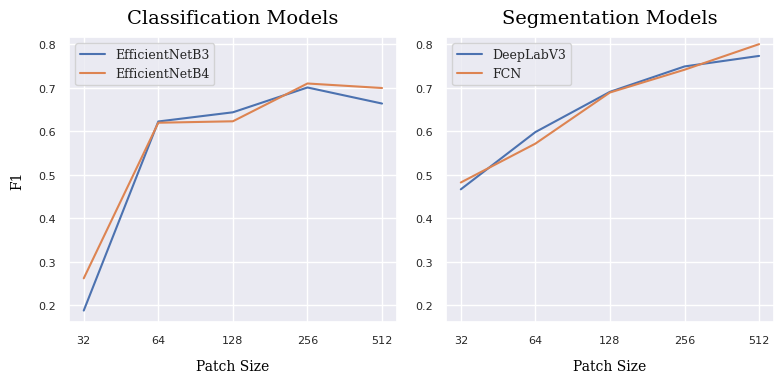

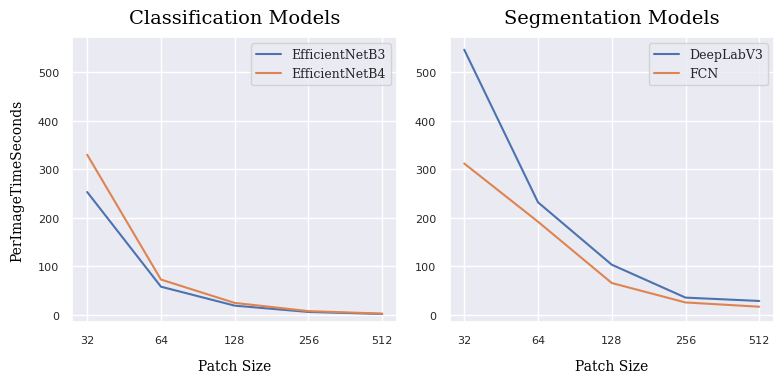

In [92]:
plot("PathSize", "F1")
plot("PathSize", "PerImageTimeSeconds")

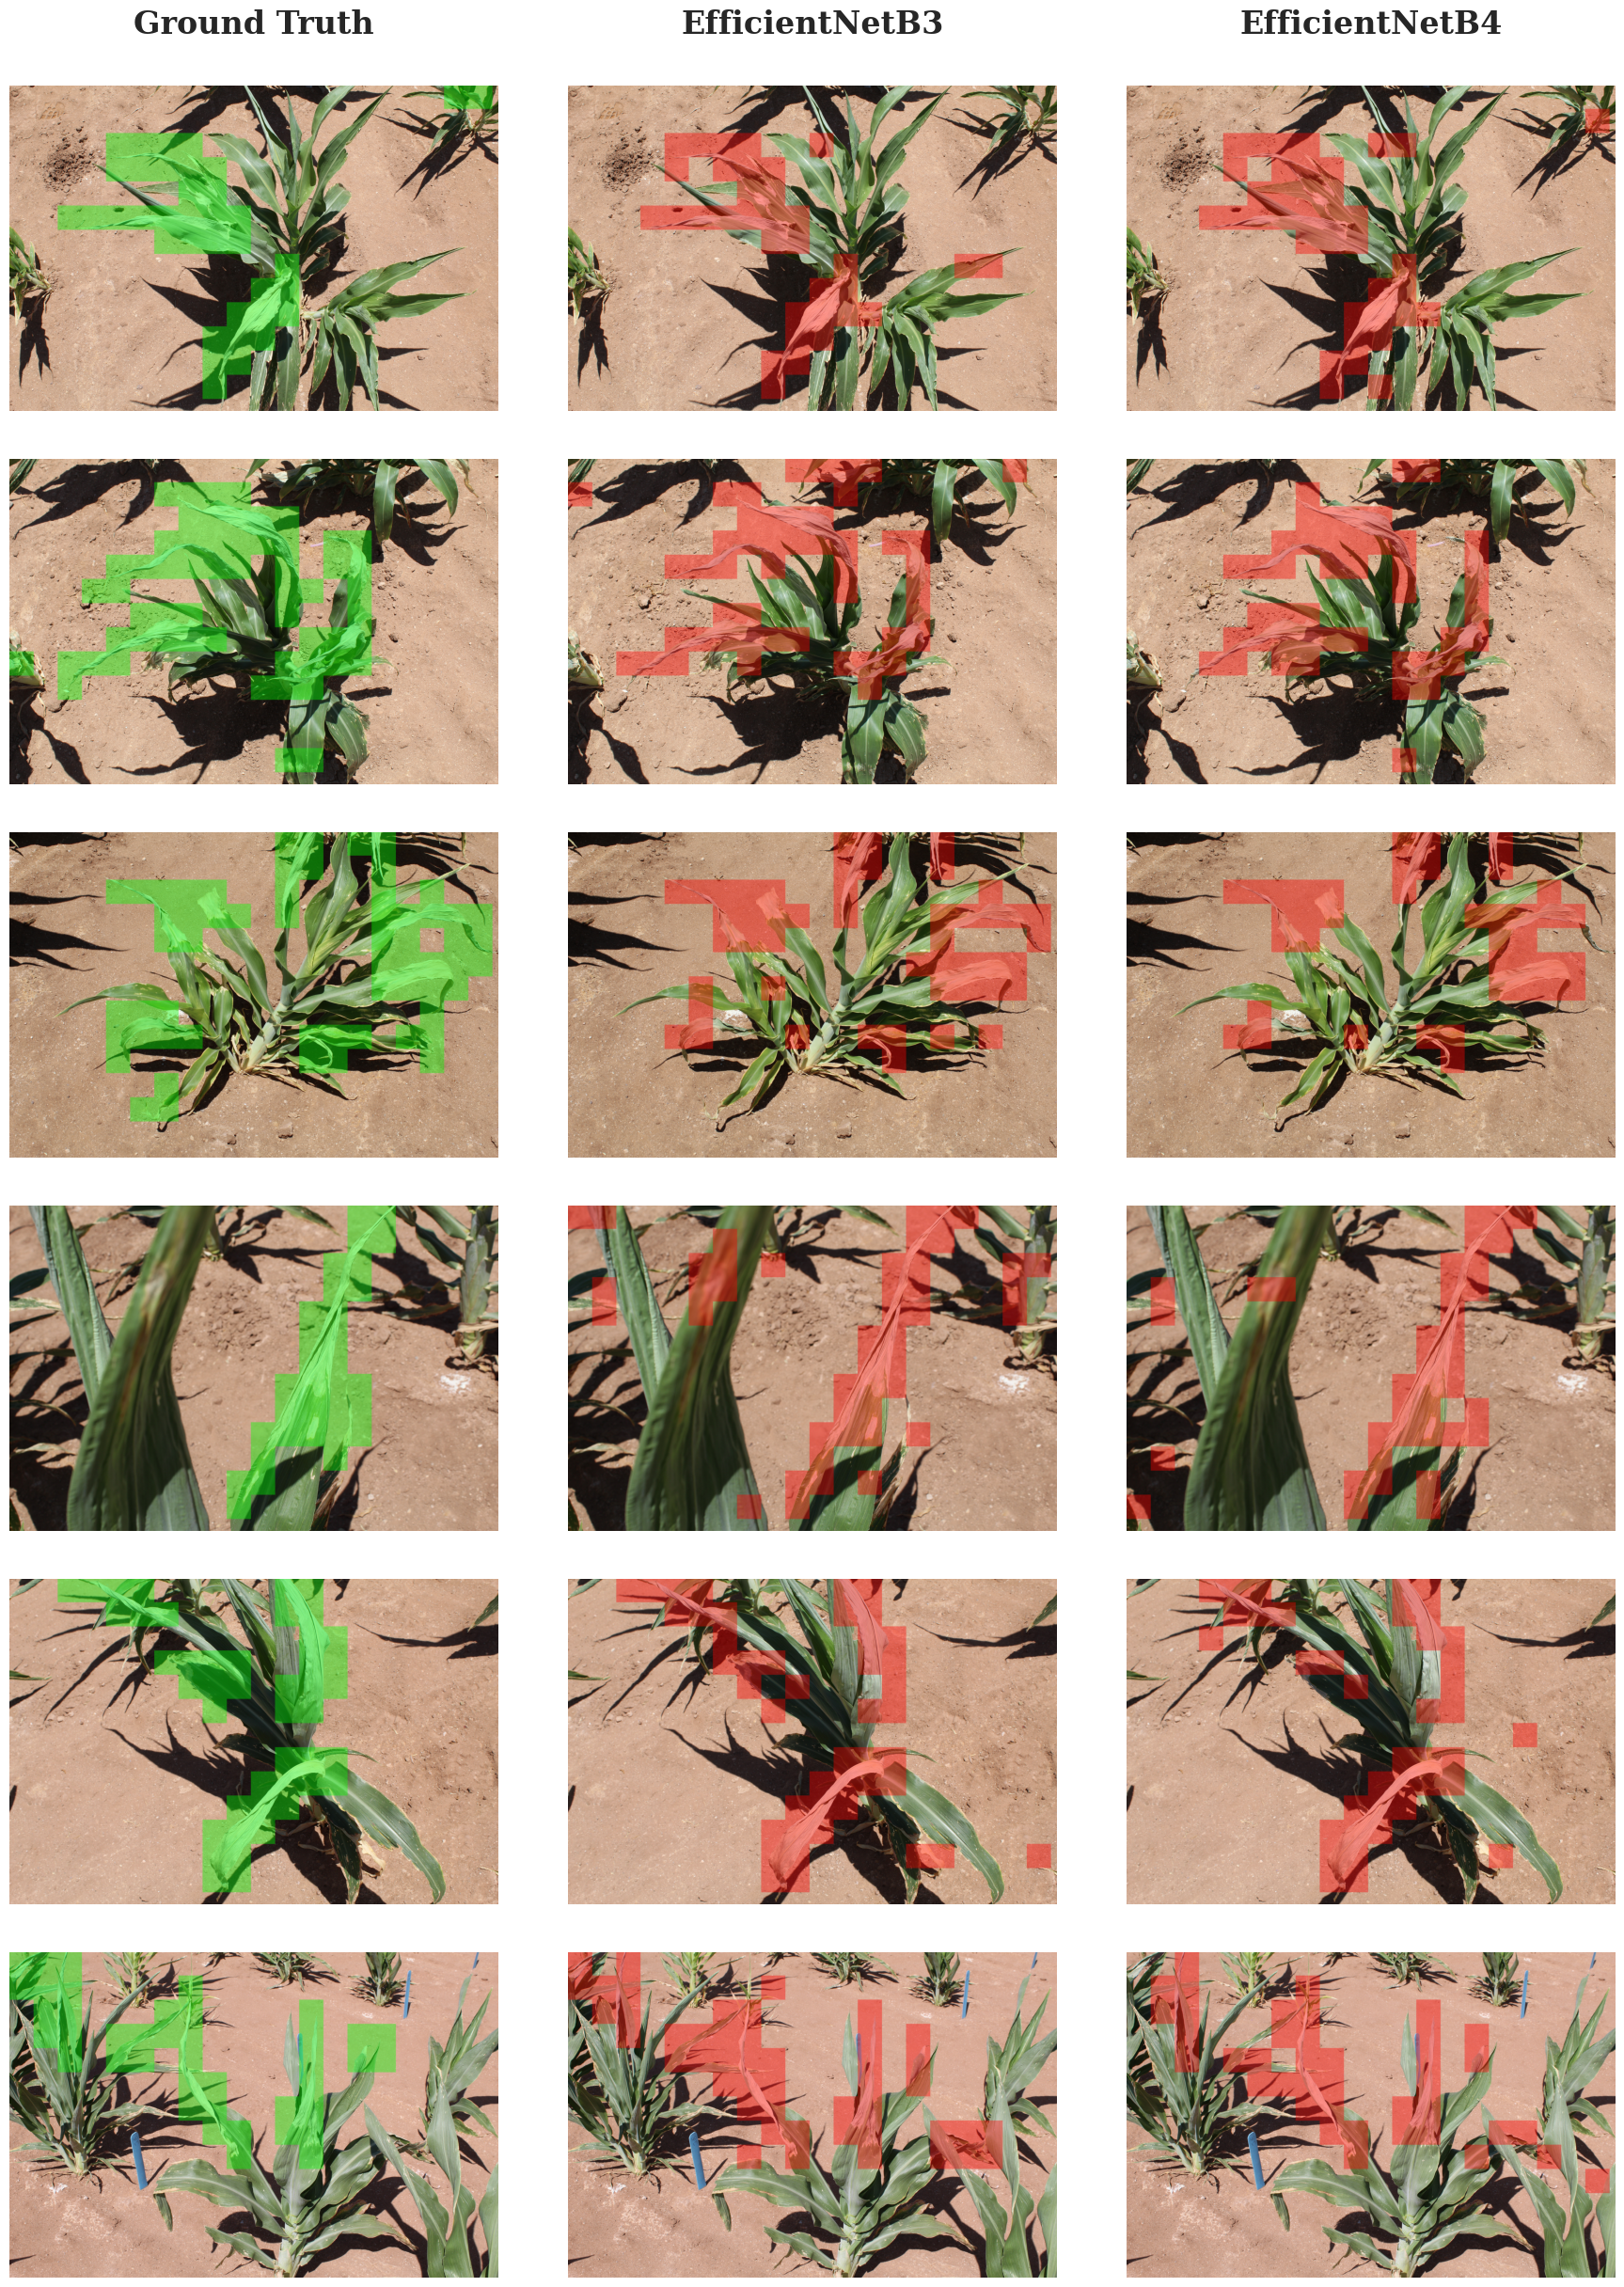

In [11]:

mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.titlepad'] = 40
mpl.rcParams['axes.titleweight'] = "bold"
mpl.rcParams['font.family'] = 'serif'

path = "/space/ariyanzarei/charcoal_dry_rot/results"
images_name = ["IMG_0335","IMG_0337","IMG_0440","IMG_0582","IMG_0596","IMG_0711"]
model_names = ["EfficientNetB3", "EfficientNetB4"]
best_patch_size = 256

fig, axes = plt.subplots(len(images_name), len(model_names)+1)
fig.set_size_inches(len(images_name)*3,4*len(images_name))
fig.tight_layout()

for i,image_name in enumerate(images_name):
    gt_path = os.path.join(path,f"{model_names[0]}-{best_patch_size}",f"{image_name}_GT.JPG")
    img = cv2.imread(gt_path)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    axes[i,0].imshow(img)
    axes[i,0].axis('off')
    if i == 0:
        axes[i,0].title.set_text("Ground Truth")

    for j, model_name in enumerate(model_names):
        img = cv2.imread(os.path.join(path,f"{model_name}-{best_patch_size}",f"{image_name}_PR.JPG"))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        axes[i,j+1].imshow(img)
        axes[i,j+1].axis('off')
        if i == 0:
            axes[i,j+1].title.set_text(f"{model_name}")

fig.savefig("samples.jpg",bbox_inches='tight')

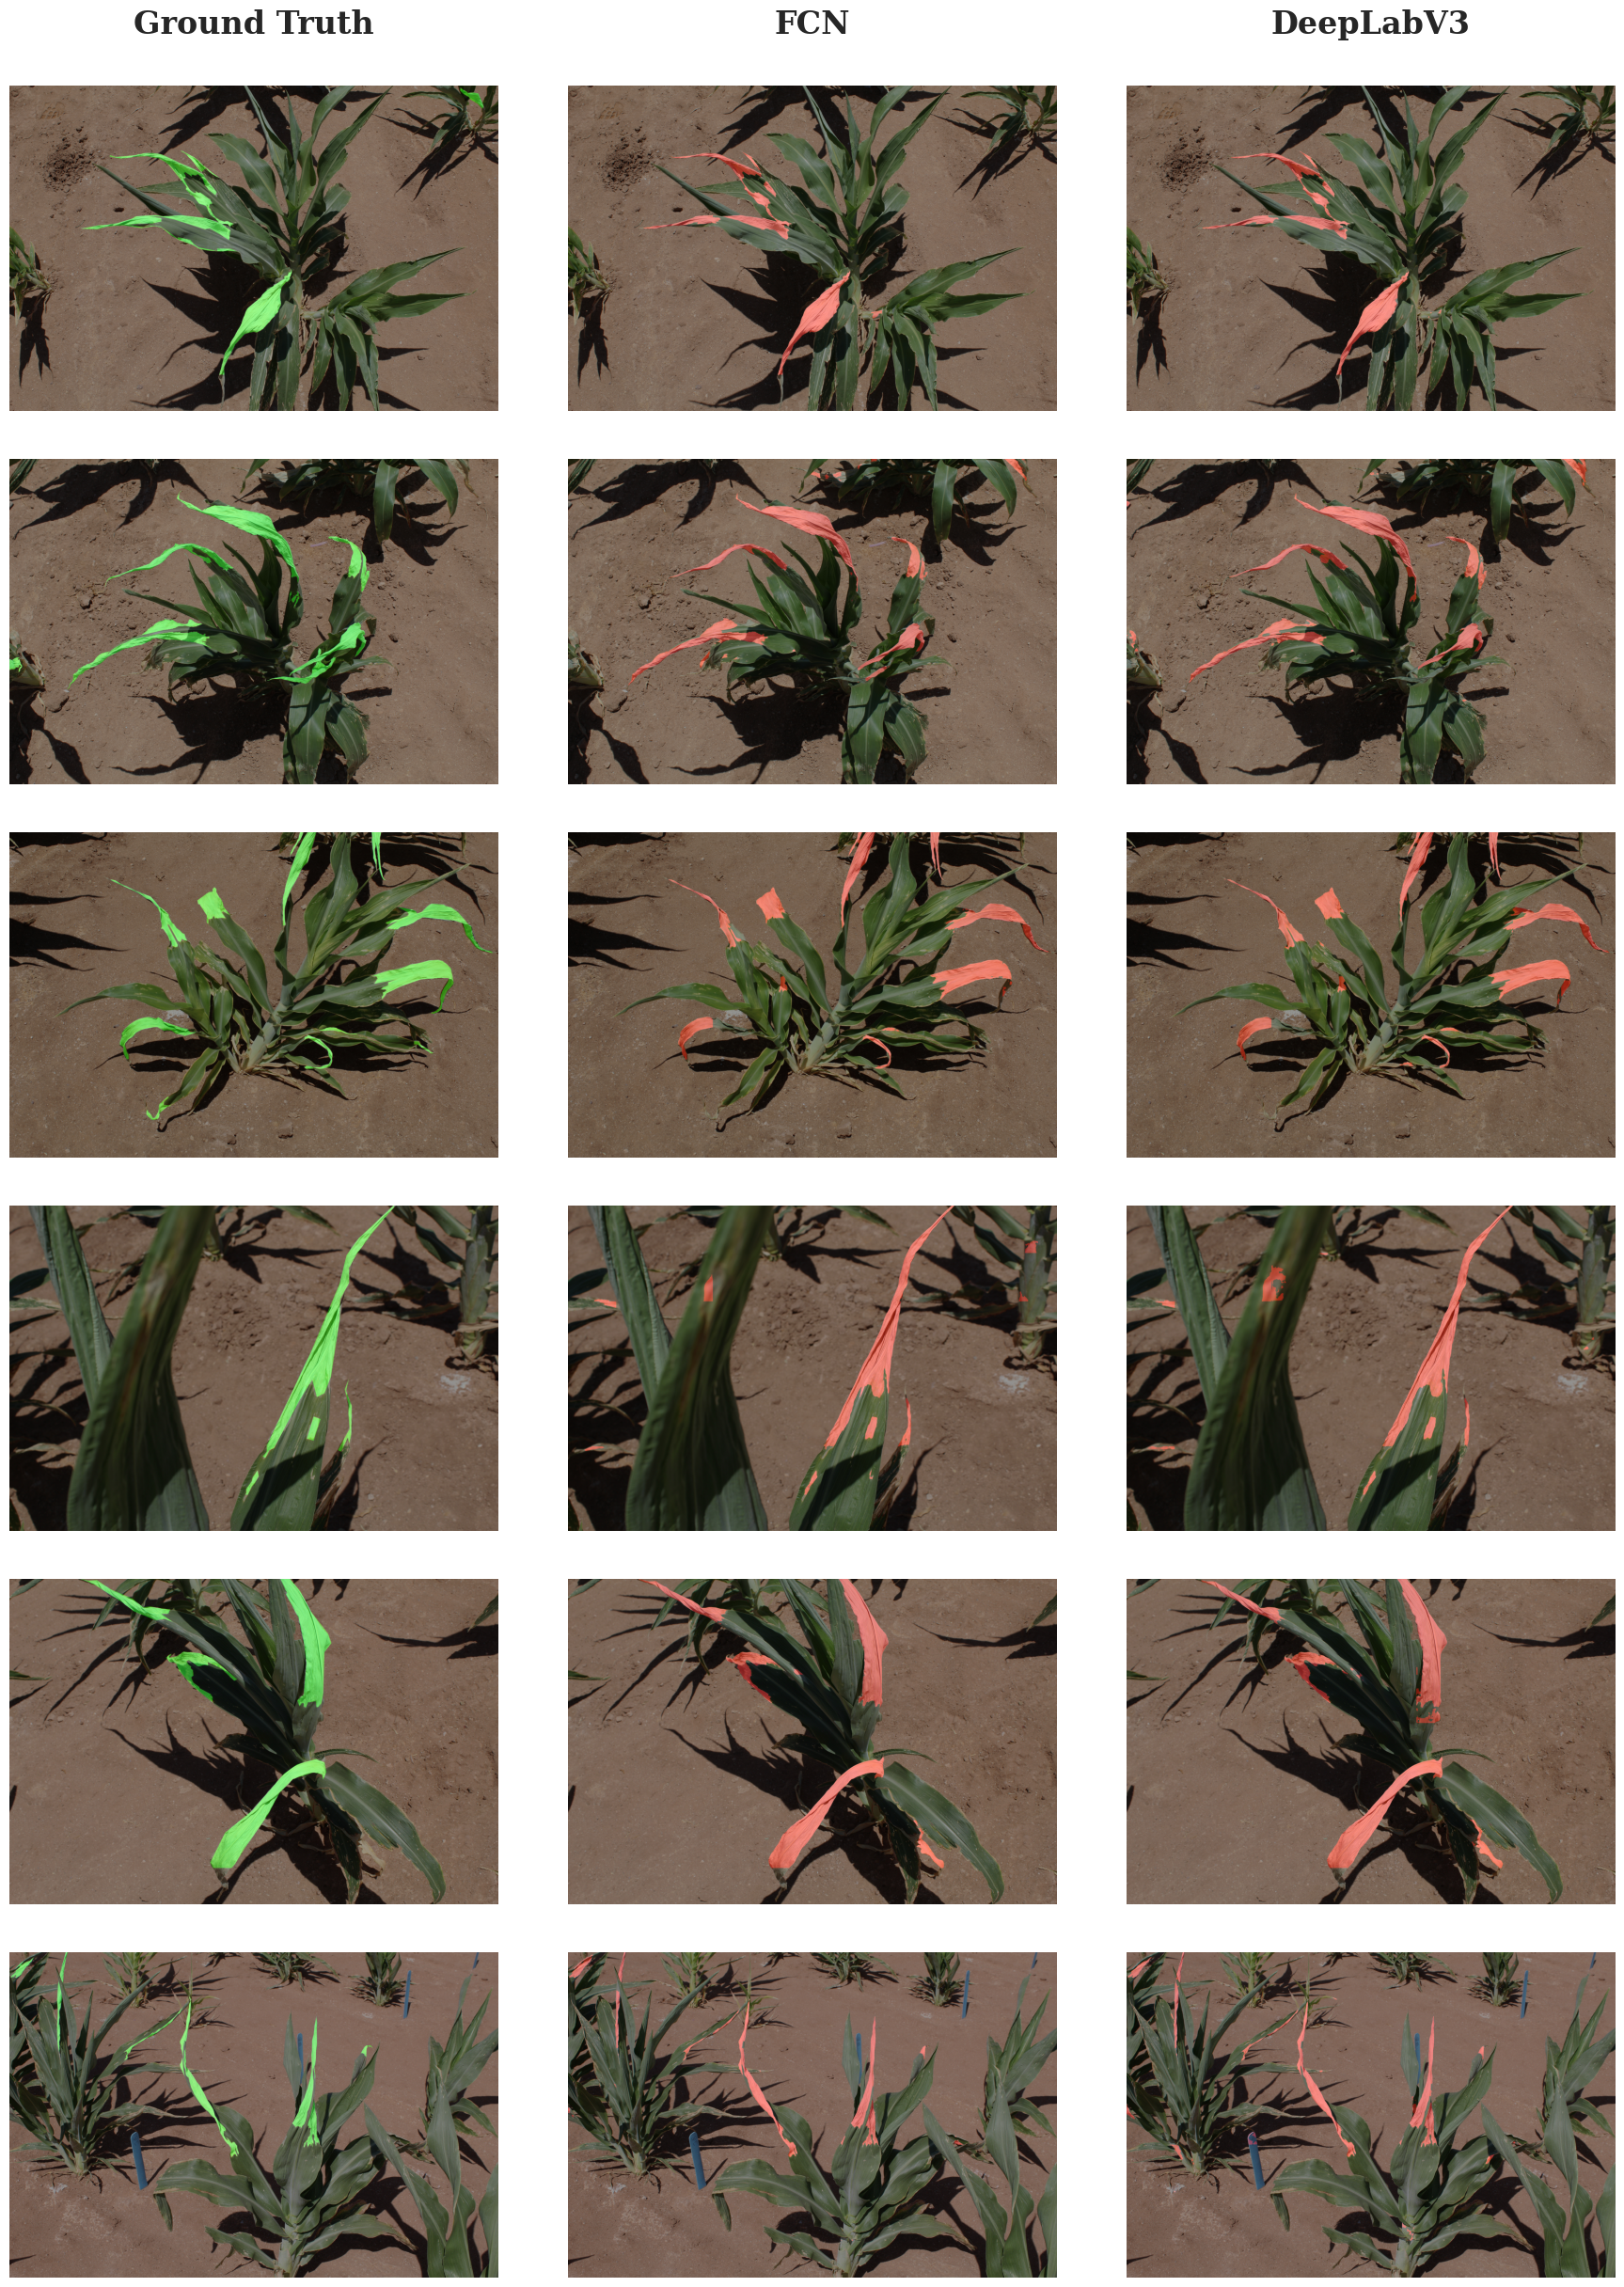

In [12]:
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.titlepad'] = 40
mpl.rcParams['axes.titleweight'] = "bold"
mpl.rcParams['font.family'] = 'serif'

path = "/space/ariyanzarei/charcoal_dry_rot/results"
images_name = ["IMG_0335","IMG_0337","IMG_0440","IMG_0582","IMG_0596","IMG_0711"]
model_names = ["FCN", "DeepLabV3"]
best_patch_size = 512

fig, axes = plt.subplots(len(images_name), len(model_names)+1)
fig.set_size_inches(len(images_name)*3,4*len(images_name))
fig.tight_layout()

for i,image_name in enumerate(images_name):
    gt_path = os.path.join(path,f"{model_names[0]}-{best_patch_size}",f"{image_name}_GT.JPG")
    img = cv2.imread(gt_path)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    axes[i,0].imshow(img)
    axes[i,0].axis('off')
    if i == 0:
        axes[i,0].title.set_text("Ground Truth")

    for j, model_name in enumerate(model_names):
        img = cv2.imread(os.path.join(path,f"{model_name}-{best_patch_size}",f"{image_name}_PR.JPG"))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        axes[i,j+1].imshow(img)
        axes[i,j+1].axis('off')
        if i == 0:
            axes[i,j+1].title.set_text(f"{model_name}")

fig.savefig("samples.jpg",bbox_inches='tight')